# Data Homework: Chapter 9

Name: Andrew Narum

Directions: Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=pUBb) using pandas_datareader.

>Real Potential GDP: GDPPOT
>
>Potential GDP: NGDPPOT
>
>Real GDP: GDPC1
>
>Consumption: PCEC
>
>Investment: GPDI
>
>Government Spending: FGEXPND
>
>Federal Debt: GFDEBTN
>
>Nominal GDP: GDP


In [14]:
import datetime
from datlib.FRED import *
#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"Real Potential GDP": "GDPPOT",
               "Potential GDP": "NGDPPOT",
               "Real GDP": "GDPC1",
               "Consumption": "PCEC",
               "Investment": "GPDI",
               "Federal Spending": "FGEXPND",
               "Federal Debt": "GFDEBTN",
               "Nominal GDP": "GDP",
               "GDP Deflator": "GDPDEF",
               "10 Year U.S. Treasury Rate":"DGS10"}
# Select start and end dates
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "Q")
data

,Real Potential GDP,Potential GDP,Real GDP,Consumption,Investment,Federal Spending,Federal Debt,Nominal GDP,GDP Deflator,10 Year U.S. Treasury Rate
DATE,,,,,,,,,,
1975-03-31,5821.185285,1695.616153,5551.713,985.190,244.306,354.024,509659.0,1616.116,29.110,7.544167
1975-06-30,5866.888923,1734.405994,5591.382,1013.582,243.281,377.665,533188.0,1651.853,29.543,8.051875
1975-09-30,5912.175162,1778.624959,5687.087,1047.192,265.192,379.106,553647.0,1709.820,30.065,8.291562
1975-12-31,5957.519332,1822.214854,5763.665,1076.223,276.236,388.241,576649.0,1761.831,30.568,8.063279
1976-03-31,6002.790250,1855.519085,5893.276,1109.908,304.638,393.991,600490.0,1820.487,30.891,7.754032
...,...,...,...,...,...,...,...,...,...,...
2021-03-31,19602.540000,22644.980000,19055.655,15005.444,3927.984,8071.420,28132570.0,22038.226,115.652,1.335902
2021-06-30,19697.360000,22983.260000,19368.310,15681.699,3925.069,7490.479,28529436.0,22740.959,117.413,1.590781
2021-09-30,19795.820000,23233.130000,19478.893,15964.938,4099.571,6560.351,28428919.0,23202.344,119.115,1.324844


In [29]:
data["Federal Debt"] = data["Federal Debt"].div(1000)
data["Federal Debt / GDP"] = data["Federal Debt"].div(data["Nominal GDP"])
data["Inflation"] = data["GDP Deflator"].pct_change(4)*100
data["Real 10 Year U.S. Treasury Rate"] = data["10 Year U.S. Treasury Rate"].sub(data["Inflation"])
data

,Real Potential GDP,Potential GDP,Real GDP,Consumption,Investment,Federal Spending,Federal Debt,Nominal GDP,GDP Deflator,10 Year U.S. Treasury Rate,...,Logged Potential GDP,Logged Real GDP,Logged Nominal GDP,Logged Real Potential GDP (Diff),Logged Potential GDP (Diff),Logged Real GDP (Diff),Logged Nominal GDP(Diff),Excess Supply Rate (Diff),Log Real Excess Supply,Federal Spending as a percent of Nominal GDP
DATE,,,,,,,,,,,,,,,,,,,,,
1975-03-31,5821.185285,1695.616153,5551.713,985.190,244.306,354.024,0.509659,1616.116,29.110,7.544167,...,7.435801,8.621862,7.387781,NaN,NaN,NaN,NaN,NaN,5.596466,0.219059
1975-06-30,5866.888923,1734.405994,5591.382,1013.582,243.281,377.665,0.533188,1651.853,29.543,8.051875,...,7.458420,8.628982,7.409653,0.007821,0.022619,0.007120,0.021872,0.000747,5.618613,0.228631
1975-09-30,5912.175162,1778.624959,5687.087,1047.192,265.192,379.106,0.553647,1709.820,30.065,8.291562,...,7.483596,8.645953,7.444143,0.007689,0.025176,0.016972,0.034490,-0.009315,5.416492,0.221723
1975-12-31,5957.519332,1822.214854,5763.665,1076.223,276.236,388.241,0.576649,1761.831,30.568,8.063279,...,7.507808,8.659329,7.474109,0.007640,0.024212,0.013375,0.029966,-0.005753,5.267107,0.220362
1976-03-31,6002.790250,1855.519085,5893.276,1109.908,304.638,393.991,0.600490,1820.487,30.891,7.754032,...,7.525920,8.681567,7.506859,0.007570,0.018112,0.022238,0.032750,-0.014639,4.696055,0.216421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,19602.540000,22644.980000,19055.655,15005.444,3927.984,8071.420,28.132570,22038.226,115.652,1.335902,...,10.027693,9.855119,10.000534,0.004628,0.014660,0.015222,0.025768,-0.011108,6.304239,0.366246
2021-06-30,19697.360000,22983.260000,19368.310,15681.699,3925.069,7490.479,28.529436,22740.959,117.413,1.590781,...,10.042521,9.871394,10.031923,0.004825,0.014828,0.016274,0.031389,-0.016561,5.796210,0.329383
2021-09-30,19795.820000,23233.130000,19478.893,15964.938,4099.571,6560.351,28.428919,23202.344,119.115,1.324844,...,10.053335,9.877087,10.052009,0.004986,0.010813,0.005693,0.020086,-0.009272,5.758671,0.282745


1.	Calculate the difference between Potential GDP and observed GDP. Assume that Potential GDP represents Long-run Aggregate Supply (LRAS). Plot these values. Indicate whether positive (negative) values represent an excess supply of goods or excess demand for goods.

C:\Users\ajnar\Documents\Spring 2022 School\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


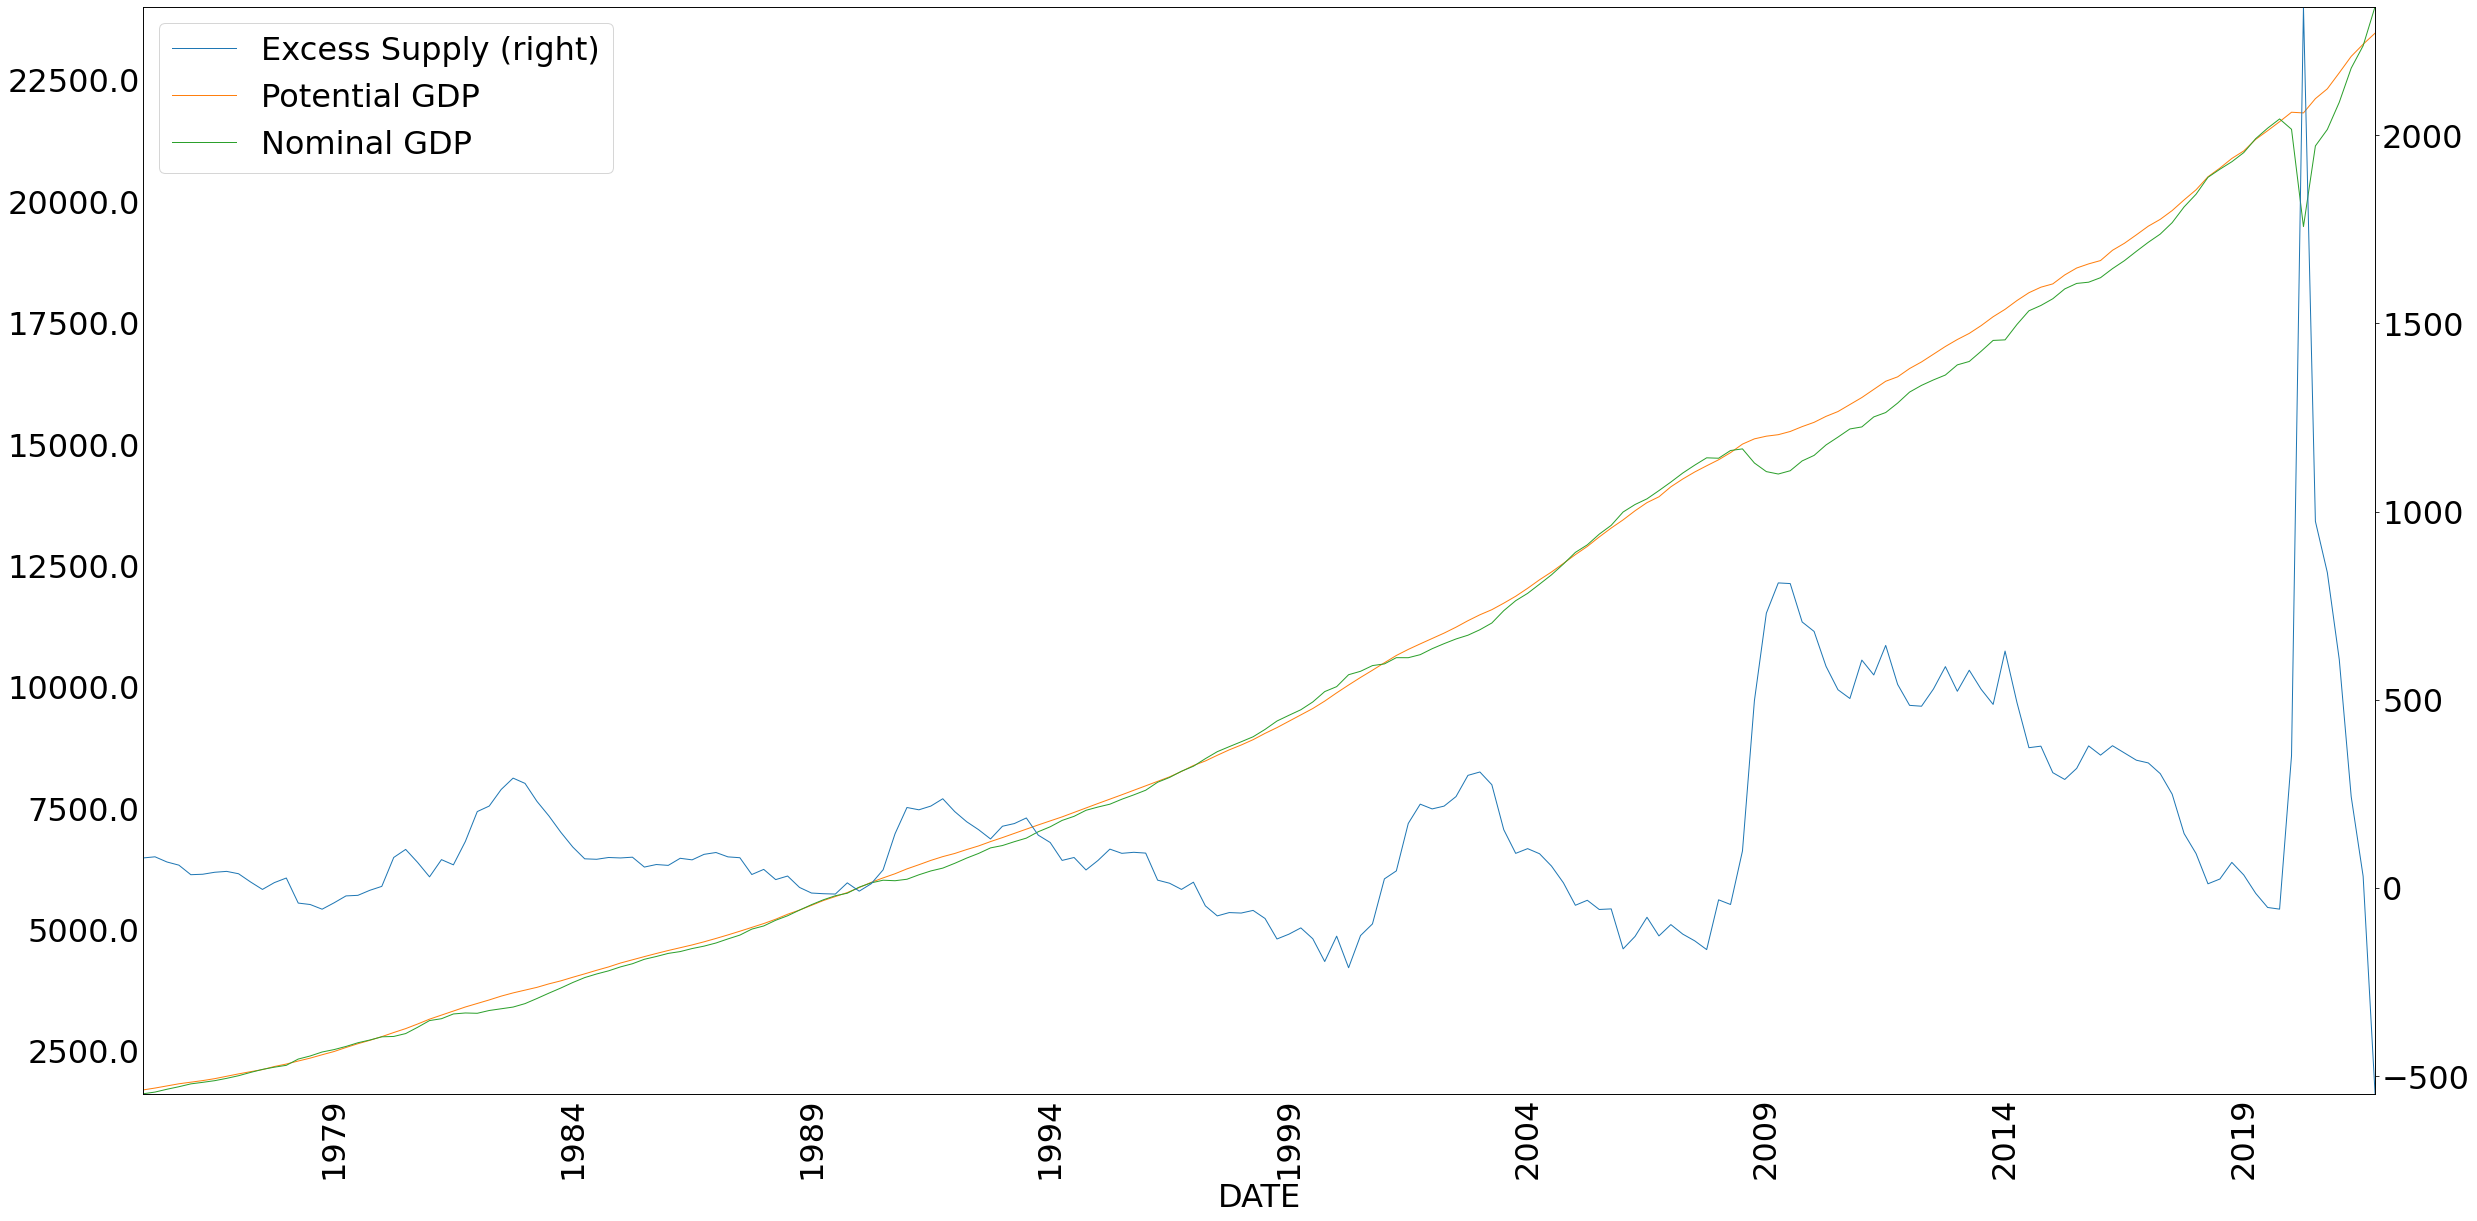

In [30]:
from datlib.plots import *
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
# a negative excess supply of goods is an excess demand for goods
# Potential GDP approximates LRAS
# Nominal (observed) GDP is our estimate of aggregate demand
data["Excess Supply"] = data["Potential GDP"].sub(data["Nominal GDP"])
data_to_plot = data[["Excess Supply", "Potential GDP", "Nominal GDP"]]
plot_lines(data_to_plot, secondary_y = "Excess Supply")

## Next, as example, I will calculate the excess supply using logged values.

In [17]:
# Use a for loop to create logged values
# data_codes.keys() will call the variable names 
# we defined at the beginning of the assignment
# you can perform a similar operation to create 
# log-differenced values
for name in data_codes.keys():
    data["Log "+name] = np.log(data[name])

C:\Users\ajnar\Documents\Spring 2022 School\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


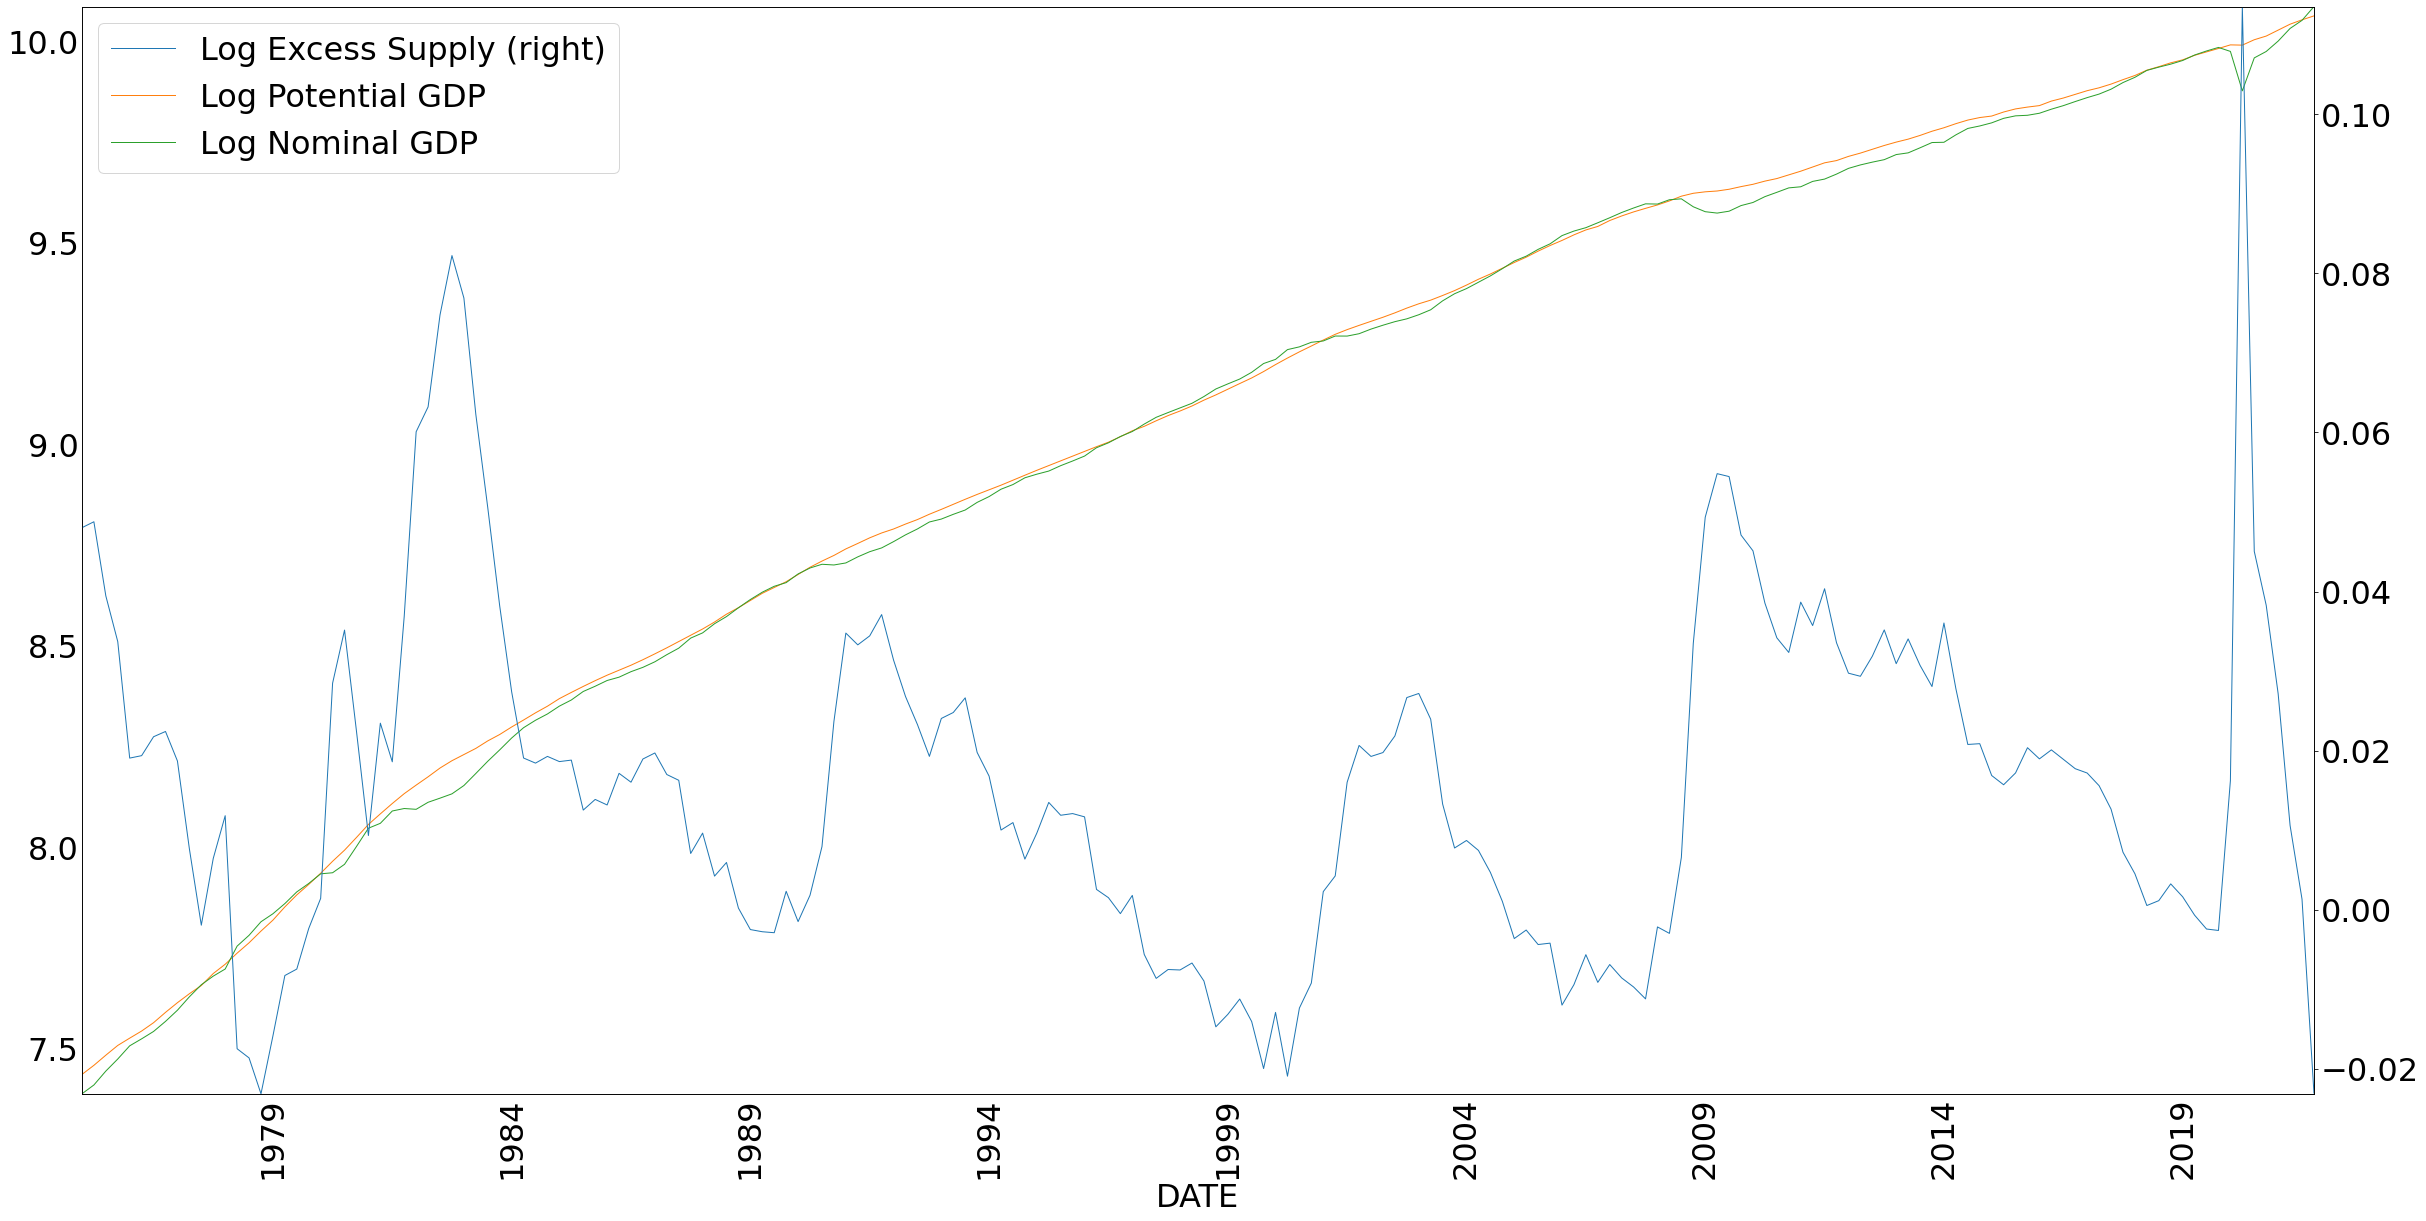

In [31]:
data["Log Excess Supply"] = data["Log Potential GDP"].sub(data["Log Nominal GDP"])
data_to_plot = data[["Log Excess Supply", "Log Potential GDP", "Log Nominal GDP"]]
plot_lines(data_to_plot, secondary_y = "Log Excess Supply")

2.	Calculate Real Excess Supply of or Demand for Goods using calculation similar to those used in questions 1. Plot these values. Indicate whether positive (negative) values represent an excess supply of goods or excess demand for goods.

C:\Users\ajnar\Documents\Spring 2022 School\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


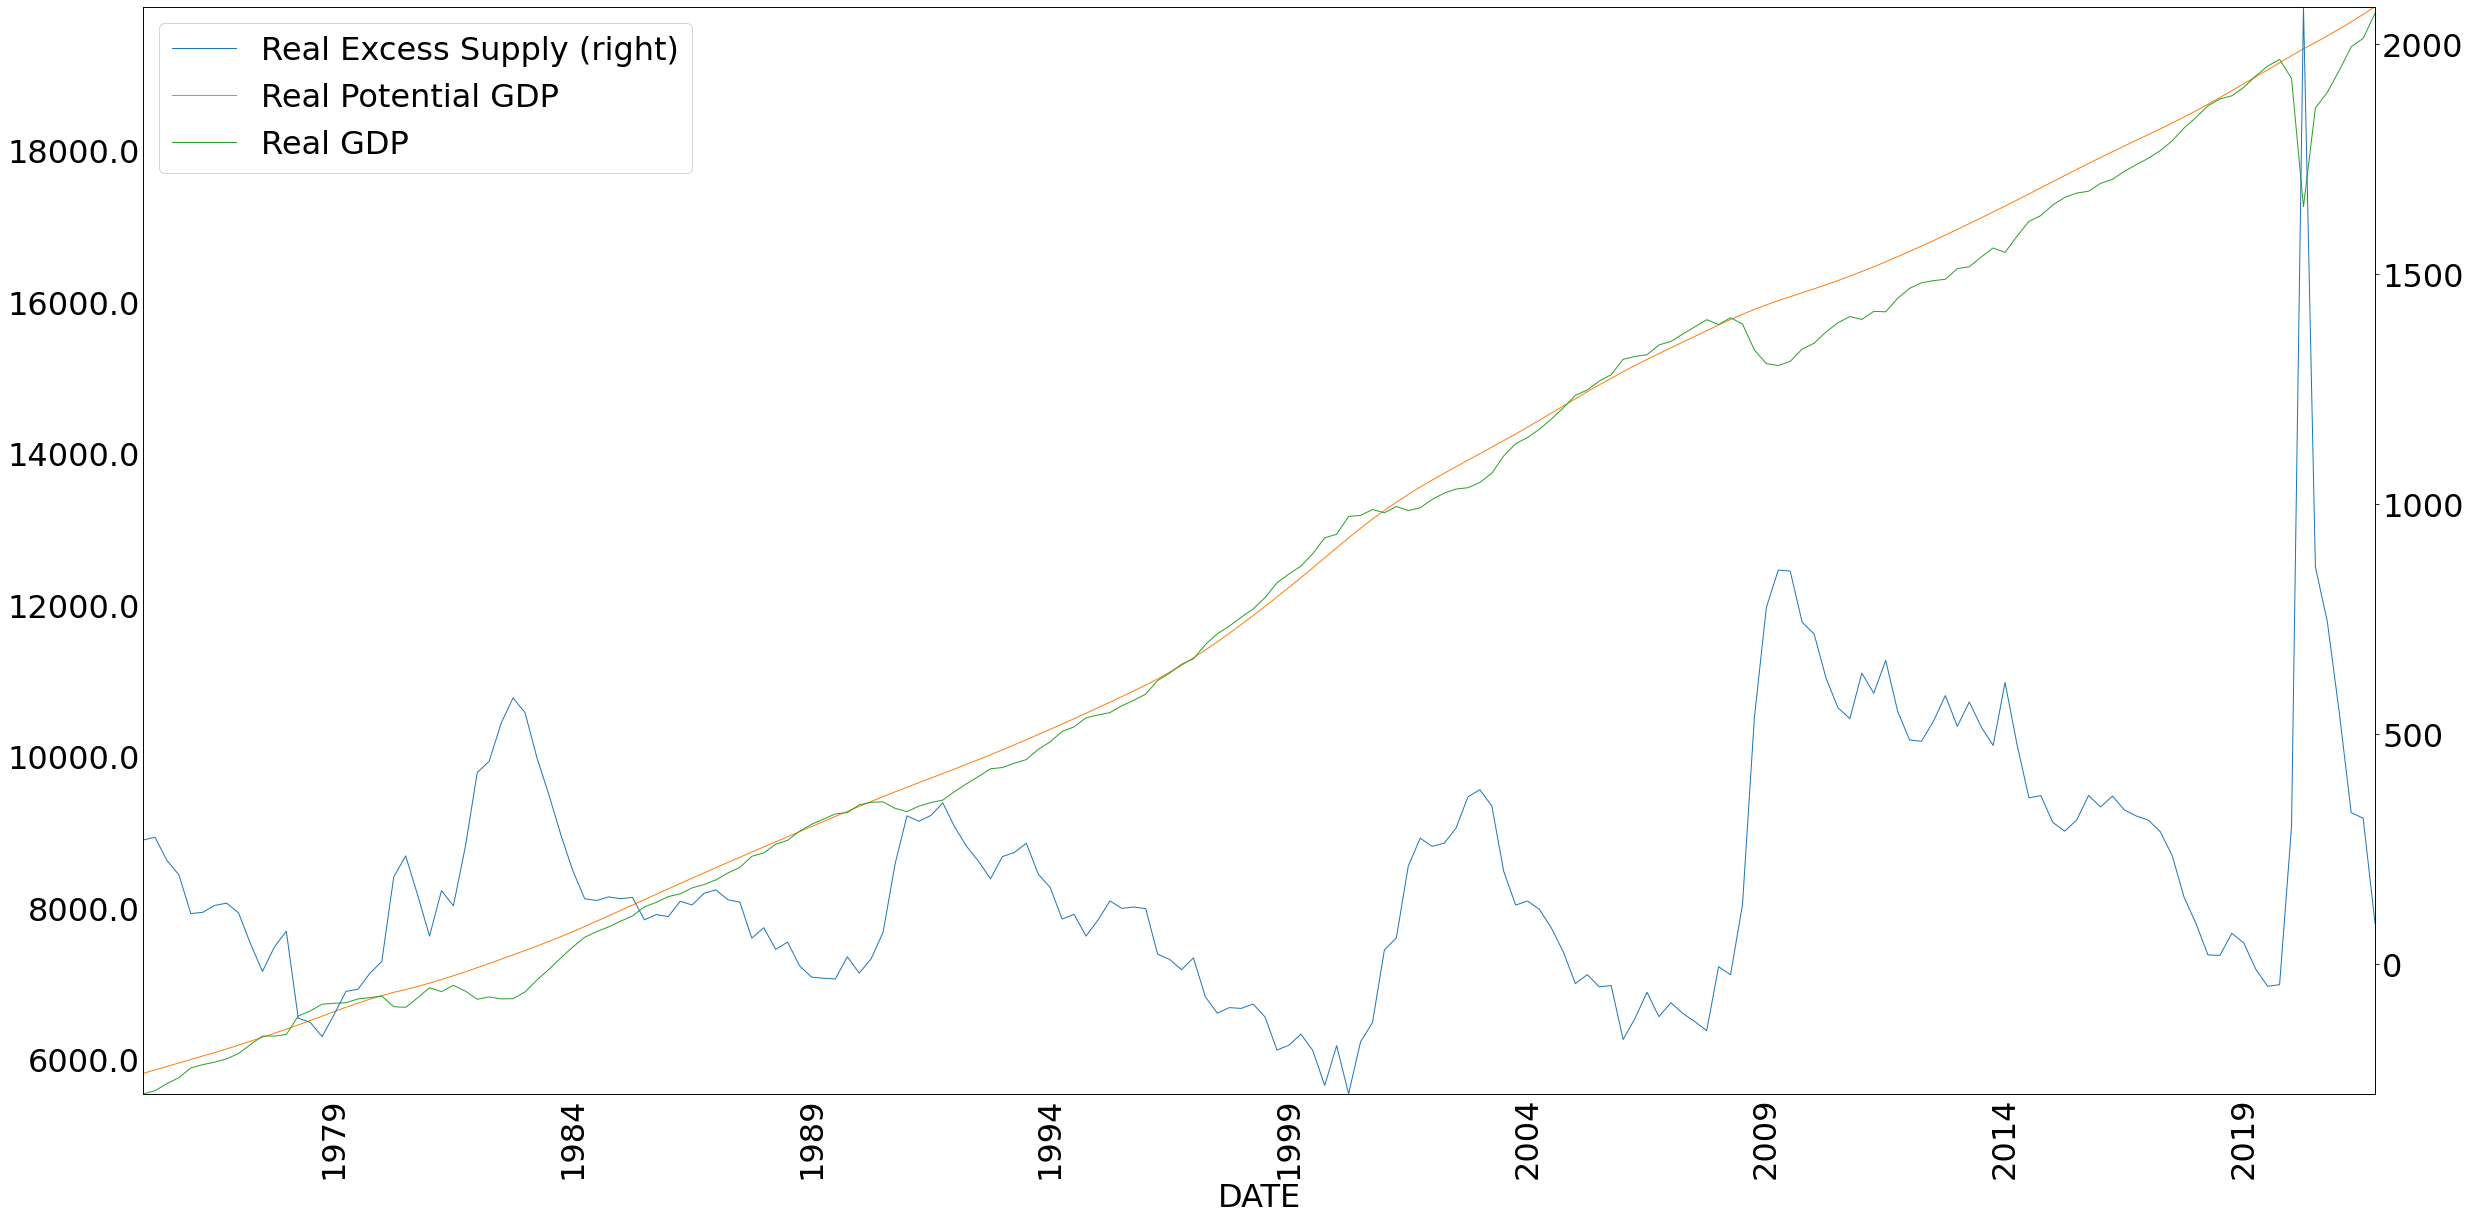

In [32]:
from datlib.plots import *
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
# a negative excess supply of goods is an excess demand for goods
# Potential GDP approximates LRAS
# Nominal (observed) GDP is our estimate of aggregate demand
data["Real Excess Supply"] = data["Real Potential GDP"].sub(data["Real GDP"])
data_to_plot = data[["Real Excess Supply", "Real Potential GDP", "Real GDP"]]
plot_lines(data_to_plot, secondary_y = "Real Excess Supply")

Most of the graph of the graph above has Real Excess Supply greater than zero. This means there is usually a real excess supply. Positive values on secondary-y represents Real Excess Supply and negative represents Real Excess Demand.

3.	Calculate the logged-difference for each variable Real Potential GDP, Potential GDP, Real GDP, and Nominal GDP. 

In [33]:
import numpy as np
log_data = np.log(data)
data["Logged Real Potential GDP"] = np.log (data["Real Potential GDP"])
data["Logged Potential GDP"] = np.log(data["Potential GDP"])
data["Logged Real GDP"] = np.log(data["Real GDP"])
data["Logged Nominal GDP"] = np.log(data["Nominal GDP"])
data

,Real Potential GDP,Potential GDP,Real GDP,Consumption,Investment,Federal Spending,Federal Debt,Nominal GDP,GDP Deflator,10 Year U.S. Treasury Rate,...,Logged Potential GDP,Logged Real GDP,Logged Nominal GDP,Logged Real Potential GDP (Diff),Logged Potential GDP (Diff),Logged Real GDP (Diff),Logged Nominal GDP(Diff),Excess Supply Rate (Diff),Log Real Excess Supply,Federal Spending as a percent of Nominal GDP
DATE,,,,,,,,,,,,,,,,,,,,,
1975-03-31,5821.185285,1695.616153,5551.713,985.190,244.306,354.024,0.509659,1616.116,29.110,7.544167,...,7.435801,8.621862,7.387781,NaN,NaN,NaN,NaN,NaN,5.596466,0.219059
1975-06-30,5866.888923,1734.405994,5591.382,1013.582,243.281,377.665,0.533188,1651.853,29.543,8.051875,...,7.458420,8.628982,7.409653,0.007821,0.022619,0.007120,0.021872,0.000747,5.618613,0.228631
1975-09-30,5912.175162,1778.624959,5687.087,1047.192,265.192,379.106,0.553647,1709.820,30.065,8.291562,...,7.483596,8.645953,7.444143,0.007689,0.025176,0.016972,0.034490,-0.009315,5.416492,0.221723
1975-12-31,5957.519332,1822.214854,5763.665,1076.223,276.236,388.241,0.576649,1761.831,30.568,8.063279,...,7.507808,8.659329,7.474109,0.007640,0.024212,0.013375,0.029966,-0.005753,5.267107,0.220362
1976-03-31,6002.790250,1855.519085,5893.276,1109.908,304.638,393.991,0.600490,1820.487,30.891,7.754032,...,7.525920,8.681567,7.506859,0.007570,0.018112,0.022238,0.032750,-0.014639,4.696055,0.216421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,19602.540000,22644.980000,19055.655,15005.444,3927.984,8071.420,28.132570,22038.226,115.652,1.335902,...,10.027693,9.855119,10.000534,0.004628,0.014660,0.015222,0.025768,-0.011108,6.304239,0.366246
2021-06-30,19697.360000,22983.260000,19368.310,15681.699,3925.069,7490.479,28.529436,22740.959,117.413,1.590781,...,10.042521,9.871394,10.031923,0.004825,0.014828,0.016274,0.031389,-0.016561,5.796210,0.329383
2021-09-30,19795.820000,23233.130000,19478.893,15964.938,4099.571,6560.351,28.428919,23202.344,119.115,1.324844,...,10.053335,9.877087,10.052009,0.004986,0.010813,0.005693,0.020086,-0.009272,5.758671,0.282745


In [35]:
import numpy as np
log_data = np.log(data)
data["Logged Real Potential GDP (Diff)"] = (data)["Logged Real Potential GDP"].diff()
data["Logged Potential GDP (Diff)"] = (data)["Logged Potential GDP"].diff()
data["Logged Real GDP (Diff)"] = (data)["Logged Real GDP"].diff()
data["Logged Nominal GDP(Diff)"] = (data)["Logged Nominal GDP"].diff()
data

,Real Potential GDP,Potential GDP,Real GDP,Consumption,Investment,Federal Spending,Federal Debt,Nominal GDP,GDP Deflator,10 Year U.S. Treasury Rate,...,Logged Potential GDP,Logged Real GDP,Logged Nominal GDP,Logged Real Potential GDP (Diff),Logged Potential GDP (Diff),Logged Real GDP (Diff),Logged Nominal GDP(Diff),Excess Supply Rate (Diff),Log Real Excess Supply,Federal Spending as a percent of Nominal GDP
DATE,,,,,,,,,,,,,,,,,,,,,
1975-03-31,5821.185285,1695.616153,5551.713,985.190,244.306,354.024,0.509659,1616.116,29.110,7.544167,...,7.435801,8.621862,7.387781,NaN,NaN,NaN,NaN,NaN,5.596466,0.219059
1975-06-30,5866.888923,1734.405994,5591.382,1013.582,243.281,377.665,0.533188,1651.853,29.543,8.051875,...,7.458420,8.628982,7.409653,0.007821,0.022619,0.007120,0.021872,0.000747,5.618613,0.228631
1975-09-30,5912.175162,1778.624959,5687.087,1047.192,265.192,379.106,0.553647,1709.820,30.065,8.291562,...,7.483596,8.645953,7.444143,0.007689,0.025176,0.016972,0.034490,-0.009315,5.416492,0.221723
1975-12-31,5957.519332,1822.214854,5763.665,1076.223,276.236,388.241,0.576649,1761.831,30.568,8.063279,...,7.507808,8.659329,7.474109,0.007640,0.024212,0.013375,0.029966,-0.005753,5.267107,0.220362
1976-03-31,6002.790250,1855.519085,5893.276,1109.908,304.638,393.991,0.600490,1820.487,30.891,7.754032,...,7.525920,8.681567,7.506859,0.007570,0.018112,0.022238,0.032750,-0.014639,4.696055,0.216421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,19602.540000,22644.980000,19055.655,15005.444,3927.984,8071.420,28.132570,22038.226,115.652,1.335902,...,10.027693,9.855119,10.000534,0.004628,0.014660,0.015222,0.025768,-0.011108,6.304239,0.366246
2021-06-30,19697.360000,22983.260000,19368.310,15681.699,3925.069,7490.479,28.529436,22740.959,117.413,1.590781,...,10.042521,9.871394,10.031923,0.004825,0.014828,0.016274,0.031389,-0.016561,5.796210,0.329383
2021-09-30,19795.820000,23233.130000,19478.893,15964.938,4099.571,6560.351,28.428919,23202.344,119.115,1.324844,...,10.053335,9.877087,10.052009,0.004986,0.010813,0.005693,0.020086,-0.009272,5.758671,0.282745


4.	Using rates instead of observed values, calculate Excess Demand of or Excess Supply of Goods.

In [36]:
import numpy as np
log_data = np.log(data)
data["Excess Supply Rate (Diff)"] = (data)["Log Excess Supply"].diff()
data[["Excess Supply Rate (Diff)"]]

,Excess Supply Rate (Diff)
DATE,
1975-03-31,NaN
1975-06-30,0.000747
1975-09-30,-0.009315
1975-12-31,-0.005753
1976-03-31,-0.014639
...,...
2021-03-31,-0.011108
2021-06-30,-0.016561
2021-09-30,-0.009272


5.	Using rates instead of observed values, calculate Real Excess Demand of or Real Excess Supply of Goods.

In [37]:
data["Log Real Excess Supply"] = np.log(data["Real Excess Supply"])
data[["Log Real Excess Supply"]]

C:\Users\ajnar\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Log Real Excess Supply
DATE,
1975-03-31,5.596466
1975-06-30,5.618613
1975-09-30,5.416492
1975-12-31,5.267107
1976-03-31,4.696055
...,...
2021-03-31,6.304239
2021-06-30,5.796210
2021-09-30,5.758671


6.	Calculate government spending as a percent of Nominal GDP and plot this new variable. How has this variable changed over the last several decades?

In [38]:
data["Federal Spending as a percent of Nominal GDP"] = data["Federal Spending"] / data["Nominal GDP"]
data[["Federal Spending as a percent of Nominal GDP"]]

,Federal Spending as a percent of Nominal GDP
DATE,
1975-03-31,0.219059
1975-06-30,0.228631
1975-09-30,0.221723
1975-12-31,0.220362
1976-03-31,0.216421
...,...
2021-03-31,0.366246
2021-06-30,0.329383
2021-09-30,0.282745


C:\Users\ajnar\Documents\Spring 2022 School\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Macroeconomics-Growth-and-Monetary-Equilibrium-main\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


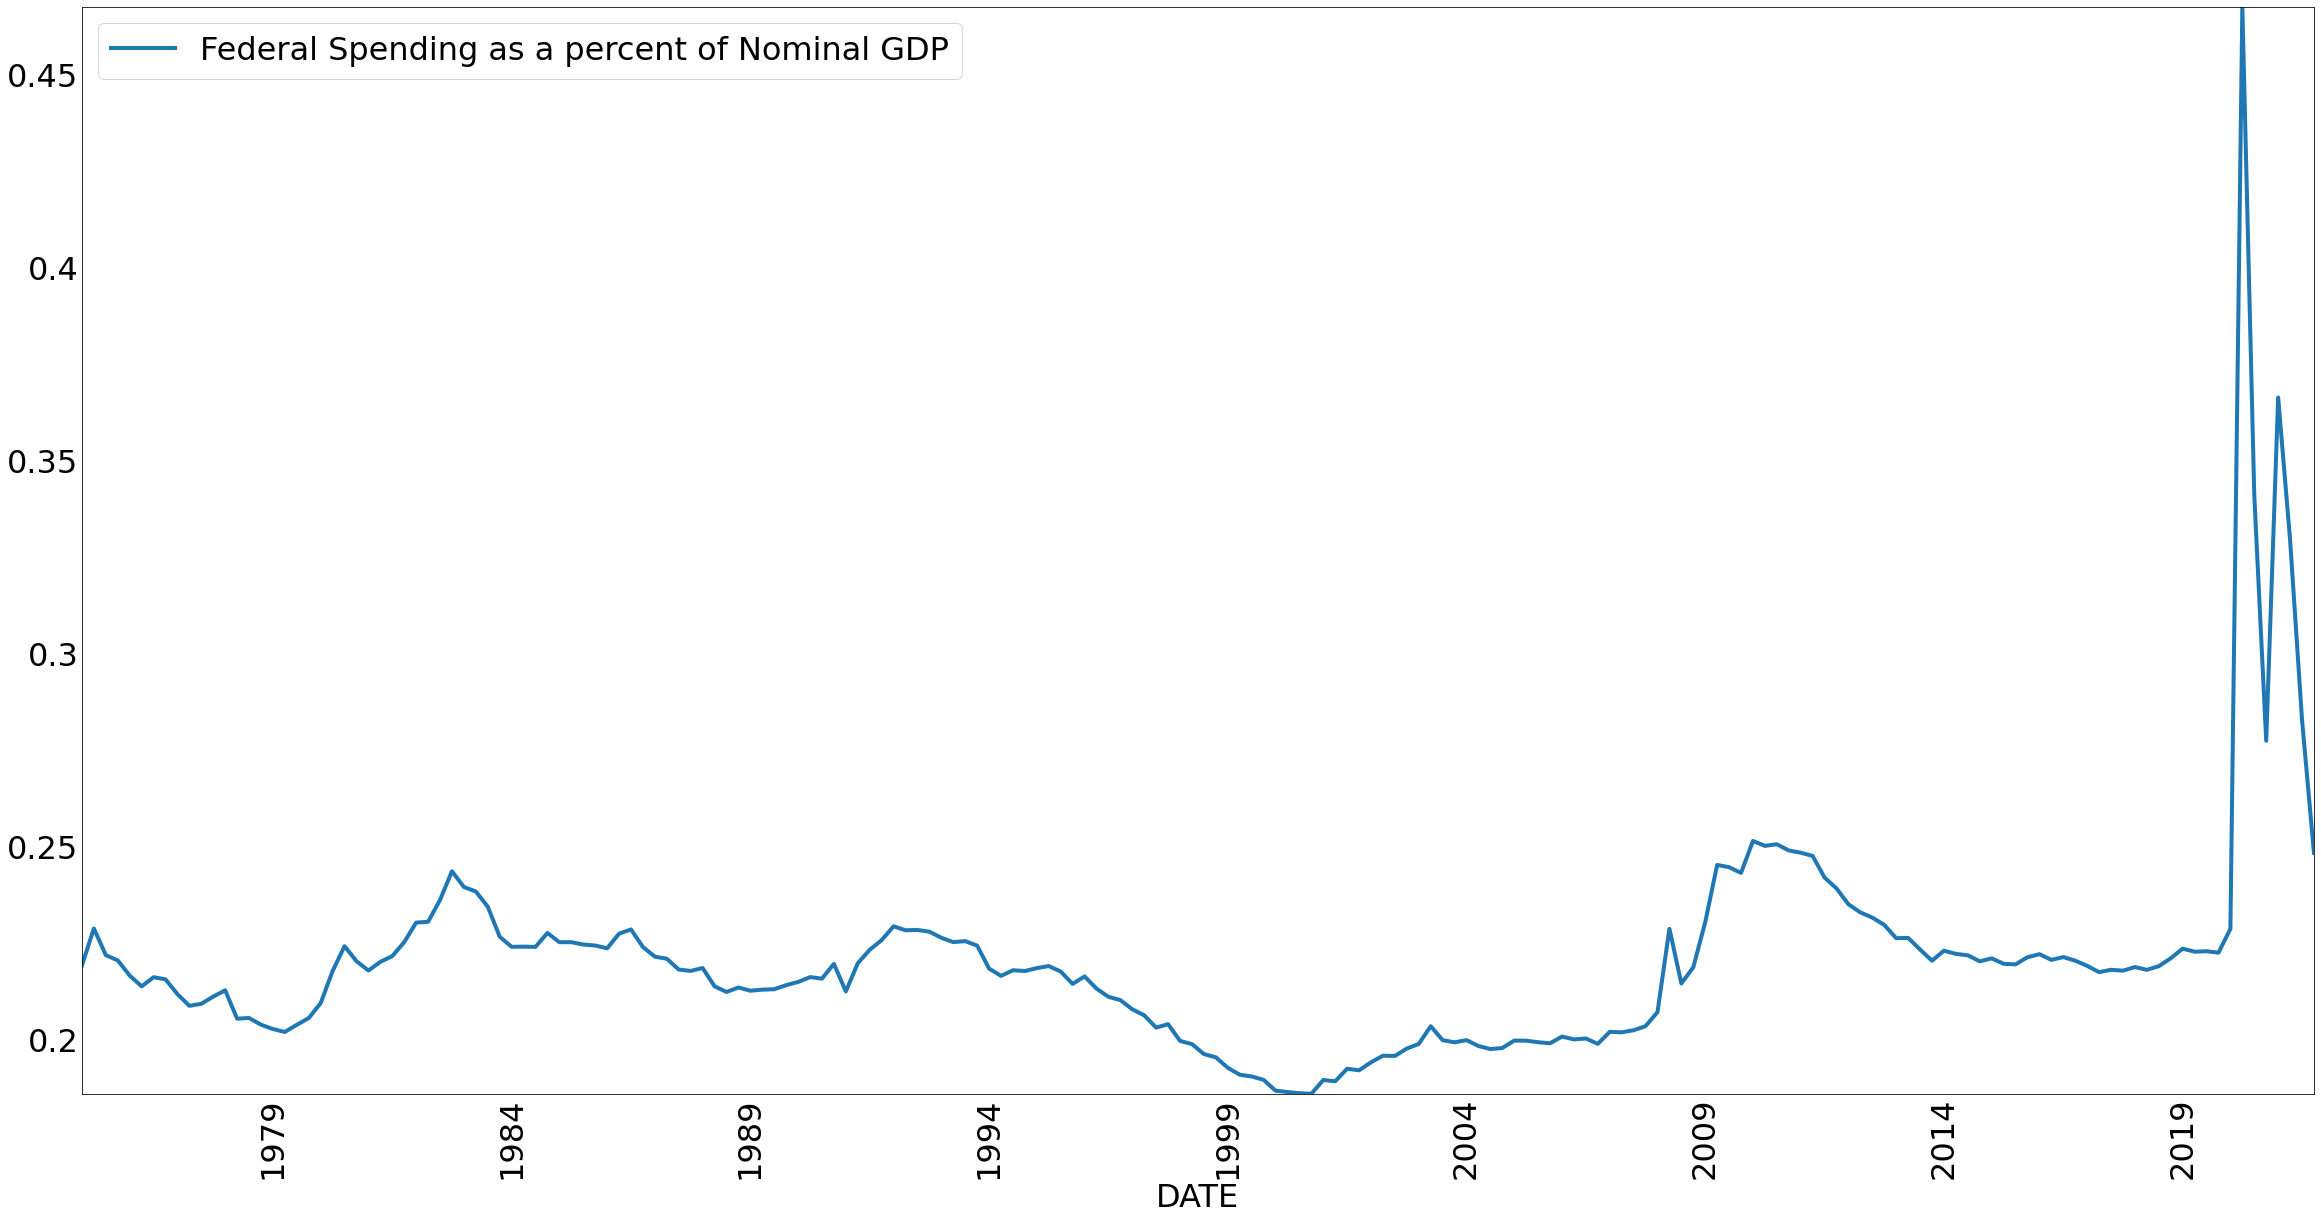

In [39]:
from datlib.plots import * 
plot_variables = ["Federal Spending as a percent of Nominal GDP"]
plot_lines(data[plot_variables], linewidth=4)


Federal Spending as a percent of nominal GDP has increased in the last decade. In the last few years, this variable has been super volatile in the last few years, increasing to almost 50% around 2020. It looks like on average, this percentage hangs between 20-25%. I would assume the government spending was so high in 2020 due to the Covid-19 pandemic. This caused the government to pay people using stimulus checks, in effort to stimulate the economy. That was the only time it has ever gone over 30%. Also, around 2000, the percentage was at an all time low due to unknown factors. 